In [1]:
import pandas as pd



# Profundización en Métodos de Pandas

Pandas es una poderosa biblioteca de Python para el análisis de datos. A continuación, exploraremos en detalle algunos de los métodos más importantes, en este caso : `merge`.

## 1. `merge`

El método `merge` se utiliza para combinar dos DataFrames en función de una o más claves. Es similar a las uniones en bases de datos SQL, por eso existen diferentes formas de unir nuestros datos mediante `merge` con los diferentes parametros de este método, podemos ver el siguiente diagrama 



Dado que vieron hoy datos semiestructurados he creado una pequeña base de datos para que contiene informacion sobre videojuegos y desarrolladores para explicarle este método  `merge` que contiene  `pandas`

In [2]:

import pandas as pd
import json

# Cargar el archivo JSON
with open('jsondata/uno-a-uno.json', 'r') as file:
    data = json.load(file)

# Usar json_normalize para convertir las listas en DataFrames
df_videojuegos = pd.json_normalize(data, 'videojuegos') #Donde videojuegos es la llave respectiva de nuestro json 
df_desarrolladores = pd.json_normalize(data, 'desarrolladores')

# one-to-one


Existe un join llamado uno-a-uno o one-to-one, que basicamente es cuando tenemos dos dataframes con la misma cantidad de filas y con una columna en común, es decir cada valor en la clave de un dataframe aparece solo una vez y corresponde a un único valor en la clave del otro DataFrame, de esta manera al realizar  `merge`, entre dos dataframes lo que ocurre es que pandas detecta la columna en común, en este caso detecta que ambos dataframes tiene `desarrolador_id`

In [32]:
df_desarrolladores

#df_desarrolladores.rename(columns={'desarrollador_id': 'id'}, inplace=True)

id               nombre            pais  fundacion
0   1             Nintendo          JapÃ³n       1889
1   2  Santa Monica Studio  Estados Unidos       1999
2   3       Rockstar Games  Estados Unidos       1998
3   4       CD Projekt Red         Polonia       2002

In [4]:
df_videojuegos

titulo  anio_lanzamiento    genero  \
0  The Legend of Zelda: Breath of the Wild              2017  Aventura   
1                               God of War              2018   AcciÃ³n   
2                    Red Dead Redemption 2              2018  Aventura   
3                           Cyberpunk 2077              2020       RPG   

                    plataforma  desarrollador_id  
0              Nintendo Switch                 1  
1                PlayStation 4                 2  
2  PlayStation 4, Xbox One, PC                 3  
3  PlayStation 4, Xbox One, PC                 4

In [5]:
df_merged = pd.merge(df_videojuegos, df_desarrolladores, on = 'desarrollador_id') #Notemos que no es necesario escribir on = 'desarrollador_id'
df_merged

titulo  anio_lanzamiento    genero  \
0  The Legend of Zelda: Breath of the Wild              2017  Aventura   
1                               God of War              2018   AcciÃ³n   
2                    Red Dead Redemption 2              2018  Aventura   
3                           Cyberpunk 2077              2020       RPG   

                    plataforma  desarrollador_id               nombre  \
0              Nintendo Switch                 1             Nintendo   
1                PlayStation 4                 2  Santa Monica Studio   
2  PlayStation 4, Xbox One, PC                 3       Rockstar Games   
3  PlayStation 4, Xbox One, PC                 4       CD Projekt Red   

             pais  fundacion  
0          JapÃ³n       1889  
1  Estados Unidos       1999  
2  Estados Unidos       1998  
3         Polonia       2002

# Many-to-one

En pocas palabras cuando muchas filas de una tabla estan relacionadoas o vinculadas a una única fila de otra tabla




In [6]:
# Cargar el archivo JSON
with open('jsondata/many-to-one.json', 'r') as file:
    data = json.load(file)

# Usar json_normalize para convertir las listas en DataFrames
df_videojuegos_2 = pd.json_normalize(data, 'videojuegos') #Donde videojuegos es la llave respectiva de nuestro json 
df_franquicias = pd.json_normalize(data, 'franquicias')


In [7]:
df_videojuegos_2

titulo  aÃ±o_lanzamiento    genero  \
0  The Legend of Zelda: Breath of the Wild              2017  Aventura   
1     The Legend of Zelda: Ocarina of Time              1998  Aventura   
2                               God of War              2018   AcciÃ³n   
3                           God of War III              2010   AcciÃ³n   

        plataforma  desarrollador_id  franquicia_id  
0  Nintendo Switch                 1              1  
1      Nintendo 64                 1              1  
2    PlayStation 4                 2              2  
3    PlayStation 3                 2              2

In [8]:
df_franquicias

franquicia_id               nombre  numero_juegos
0              1  The Legend of Zelda             19
1              2           God of War              8

Podemos notar que dentro de nuestro dataframe `df_videojuegos_2` la columna tanto `desarrolador_id` y `franquicia_id` estan repetidas, lo que implica que una franquicia  o desarrollador puede tener multiples juegos. 

In [9]:
df_merged_many_to_one = pd.merge(df_videojuegos_2, df_franquicias)

In [10]:
df_merged_many_to_one

titulo  aÃ±o_lanzamiento    genero  \
0  The Legend of Zelda: Breath of the Wild              2017  Aventura   
1     The Legend of Zelda: Ocarina of Time              1998  Aventura   
2                               God of War              2018   AcciÃ³n   
3                           God of War III              2010   AcciÃ³n   

        plataforma  desarrollador_id  franquicia_id               nombre  \
0  Nintendo Switch                 1              1  The Legend of Zelda   
1      Nintendo 64                 1              1  The Legend of Zelda   
2    PlayStation 4                 2              2           God of War   
3    PlayStation 3                 2              2           God of War   

   numero_juegos  
0             19  
1             19  
2              8  
3              8

# Many-to-Many

In [11]:
with open('jsondata/many-to-many.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Usar json_normalize para convertir las listas en DataFrames
df_departamentos  = pd.json_normalize(data, 'departments') #Donde videojuegos es la llave respectiva de nuestro json 
df_profesores  = pd.json_normalize(data, 'professors')
display(df_departamentos, df_profesores)

department research_lines
0        Matemáticas        Álgebra
1        Matemáticas        Cálculo
2         Ingeniería          Redes
3         Ingeniería       Robótica
4  Ciencias Sociales     Sociología
5  Ciencias Sociales       Economía

professor         department
0       Dr. Pérez        Matemáticas
1      Dra. Gómez         Ingeniería
2   Dr. Rodríguez         Ingeniería
3  Dra. Fernández  Ciencias Sociales

In [12]:
display( df_profesores, df_departamentos,  pd.merge(df_departamentos, df_profesores))

professor         department
0       Dr. Pérez        Matemáticas
1      Dra. Gómez         Ingeniería
2   Dr. Rodríguez         Ingeniería
3  Dra. Fernández  Ciencias Sociales

department research_lines
0        Matemáticas        Álgebra
1        Matemáticas        Cálculo
2         Ingeniería          Redes
3         Ingeniería       Robótica
4  Ciencias Sociales     Sociología
5  Ciencias Sociales       Economía

department research_lines       professor
0        Matemáticas        Álgebra       Dr. Pérez
1        Matemáticas        Cálculo       Dr. Pérez
2         Ingeniería          Redes      Dra. Gómez
3         Ingeniería          Redes   Dr. Rodríguez
4         Ingeniería       Robótica      Dra. Gómez
5         Ingeniería       Robótica   Dr. Rodríguez
6  Ciencias Sociales     Sociología  Dra. Fernández
7  Ciencias Sociales       Economía  Dra. Fernández

# Parámetros Merge 

Como dijimos al principio nuestra función merge tiene diferentes parámetros que le podemos entregar, por lo cual a continuación nos adentraremos en ellos 

<code>
    <span style="color: #ff007f;">DataFrame.</span>
    <span style="color: #007fff;">merge</span>(
        <span style="color: #7f00ff;">right</span>,          
        <span style="color: #ff007f;">how</span>='inner', 
        <span style="color: #007fff;">on</span>=None, 
        <span style="color: #7f00ff;">left_on</span>=None, 
        <span style="color: #ff007f;">right_on</span>=None, 
        <span style="color: #007fff;">left_index</span>=False, 
        <span style="color: #7f00ff;">right_index</span>=False, 
        <span style="color: #ff007f;">sort</span>=False, 
        <span style="color: #007fff;">suffixes</span>=('_x', '_y'), 
        <span style="color: #7f00ff;">copy</span>=None, 
        <span style="color: #ff007f;">indicator</span>=False, 
        <span style="color: #007fff;">validate</span>=None
    )
</code>


### `left_on` y `right on`

Nos podemos poner en casos donde tenemos columnas que representan las misma información pero tienen diferente nombre, por lo cual al realizar un merge nos dará error, les pongo el siguiente ejemplo 

Cambiemos el nombre de la columna desarrolador id a nuestro dataframe `df_desarrolladores`

In [30]:
df_desarrolladores.rename(columns={'desarrollador_id': 'id'}, inplace=True)
display(df_desarrolladores, df_videojuegos)


id               nombre            pais  fundacion
0   1             Nintendo          JapÃ³n       1889
1   2  Santa Monica Studio  Estados Unidos       1999
2   3       Rockstar Games  Estados Unidos       1998
3   4       CD Projekt Red         Polonia       2002

titulo  anio_lanzamiento    genero  \
0  The Legend of Zelda: Breath of the Wild              2017  Aventura   
1                               God of War              2018   AcciÃ³n   
2                    Red Dead Redemption 2              2018  Aventura   
3                           Cyberpunk 2077              2020       RPG   

                    plataforma  desarrollador_id  
0              Nintendo Switch                 1  
1                PlayStation 4                 2  
2  PlayStation 4, Xbox One, PC                 3  
3  PlayStation 4, Xbox One, PC                 4

Si tratamos de realizar el mismo  `merge` que en el ejemplo one-to-one

In [14]:
df_merged = pd.merge(df_videojuegos, df_desarrolladores, on = 'desarrollador_id') #Notemos que no es necesario escribir on = 'desarrollador_id'
df_merged

KeyError: 'desarrollador_id'

Notemos que nos arroja error debido a que no existe ninguna columna  `desarrollador_id` en nuestro dataframe   `df_desarrolladores`

Tenemos dos opciones si deseamos realizar un  `merge` entre estas dos tablas, la primera es claramente realizar el cambio de nombre dentro de nuestro   dataframe `df_desarrolladores` o lo otro es ocupar uno de los parámetros que nos entre  `merge`, siendo estos  `left_on` y  `right_on`

#### Importante: Siempre y cuando sepamos que la información de las columnas representa lo mismo podemos realizar lo siguiente

In [15]:
df_merged_left_on_right_on = pd.merge(df_videojuegos, df_desarrolladores, left_on = 'desarrollador_id', right_on='id') 
df_merged_left_on_right_on

titulo  anio_lanzamiento    genero  \
0  The Legend of Zelda: Breath of the Wild              2017  Aventura   
1                               God of War              2018   AcciÃ³n   
2                    Red Dead Redemption 2              2018  Aventura   
3                           Cyberpunk 2077              2020       RPG   

                    plataforma  desarrollador_id  id               nombre  \
0              Nintendo Switch                 1   1             Nintendo   
1                PlayStation 4                 2   2  Santa Monica Studio   
2  PlayStation 4, Xbox One, PC                 3   3       Rockstar Games   
3  PlayStation 4, Xbox One, PC                 4   4       CD Projekt Red   

             pais  fundacion  
0          JapÃ³n       1889  
1  Estados Unidos       1999  
2  Estados Unidos       1998  
3         Polonia       2002

In [16]:
df_merged_right_on_left_on = pd.merge(df_desarrolladores, df_videojuegos, left_on = 'id', right_on='desarrollador_id') 
df_merged_right_on_left_on

id               nombre            pais  fundacion  \
0   1             Nintendo          JapÃ³n       1889   
1   2  Santa Monica Studio  Estados Unidos       1999   
2   3       Rockstar Games  Estados Unidos       1998   
3   4       CD Projekt Red         Polonia       2002   

                                    titulo  anio_lanzamiento    genero  \
0  The Legend of Zelda: Breath of the Wild              2017  Aventura   
1                               God of War              2018   AcciÃ³n   
2                    Red Dead Redemption 2              2018  Aventura   
3                           Cyberpunk 2077              2020       RPG   

                    plataforma  desarrollador_id  
0              Nintendo Switch                 1  
1                PlayStation 4                 2  
2  PlayStation 4, Xbox One, PC                 3  
3  PlayStation 4, Xbox One, PC                 4

No es la mejor practica, si sabemos directamente que representan la misma información basta con cambiar el nombre a la columna de cualquier dataframe y realizar el  `merge` o realizar lo siguiente

In [17]:
df_merged_drop_id = pd.merge(df_videojuegos, df_desarrolladores, left_on = 'desarrollador_id', right_on='id').drop('id', axis=1)

Lo que realizamos aca es realizar el merge entre `df_desarrolladores` y `df_videojuegos` con left_on y right_on, y posteriormente realizar `.drop(columna, axis=1)` en la columna deseada, en este caso  fue `id` debido que no es una columna muy explicativa por si sola.

`axis=1` implica que se quiere realizar drop de la columna y  no de las filas `axis=0`

In [18]:
df_merged_drop_id

titulo  anio_lanzamiento    genero  \
0  The Legend of Zelda: Breath of the Wild              2017  Aventura   
1                               God of War              2018   AcciÃ³n   
2                    Red Dead Redemption 2              2018  Aventura   
3                           Cyberpunk 2077              2020       RPG   

                    plataforma  desarrollador_id               nombre  \
0              Nintendo Switch                 1             Nintendo   
1                PlayStation 4                 2  Santa Monica Studio   
2  PlayStation 4, Xbox One, PC                 3       Rockstar Games   
3  PlayStation 4, Xbox One, PC                 4       CD Projekt Red   

             pais  fundacion  
0          JapÃ³n       1889  
1  Estados Unidos       1999  
2  Estados Unidos       1998  
3         Polonia       2002

Notemos que ya no se encuentra la columna `id`



### Tipos de Merge 

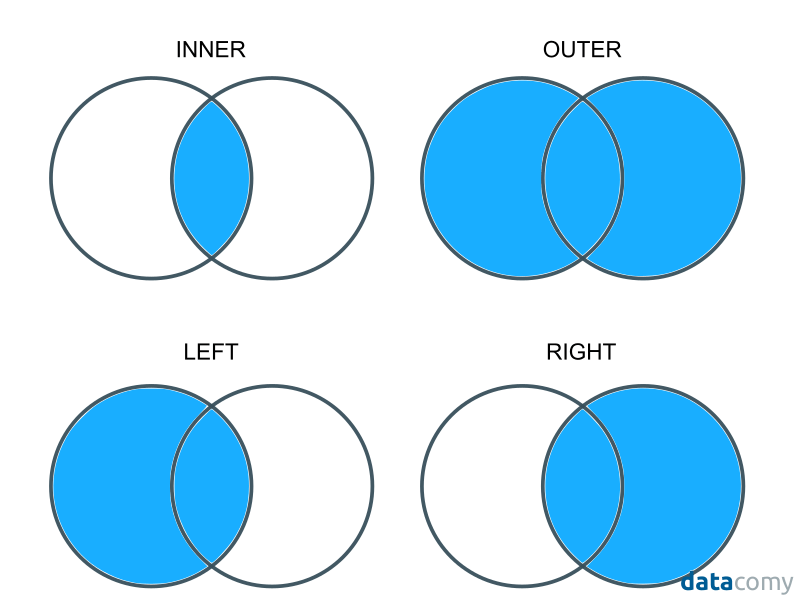

#### a). `inner`

Por default, al realizar merge el parametro `how`  está en `inner`

In [36]:
videojuegos_1 = pd.DataFrame({'titulo': ['God of war' , 'Red dead Redemption 2', ' The Legened of Zelda'],
                            'genero' : ['Accion' , 'Aventura' , 'Aventura'], 
                            
                            
                            })

videojuegos_2 = pd.DataFrame({'titulo': ['God of war' , 'Cyberpunk 2077', 'Red dead Redemption 1'],
                            'genero' : ['Accion' , ' RPG', 'Aventura '] 
                            })



videojuegos_3 = pd.DataFrame({'titulo': ['Cyberpunk 2077', 'The Legend of Zelda: Breath of the Wild'],
                            'plataforma' : ['"PlayStation 4, Xbox One, PC"', '"Nintendo Switch"'] 
                            })

In [37]:
display(videojuegos_1, videojuegos_2, videojuegos_3)

titulo    genero
0             God of war    Accion
1  Red dead Redemption 2  Aventura
2   The Legened of Zelda  Aventura

titulo     genero
0             God of war     Accion
1         Cyberpunk 2077        RPG
2  Red dead Redemption 1  Aventura

titulo                     plataforma
0                           Cyberpunk 2077  "PlayStation 4, Xbox One, PC"
1  The Legend of Zelda: Breath of the Wild              "Nintendo Switch"

No especificamos el parámetro `how`, viene por defecto como `inner`

In [38]:
videojuegos_merged = pd.merge(videojuegos_1, videojuegos_2,)
display(videojuegos_1, videojuegos_2, videojuegos_merged)

titulo    genero
0             God of war    Accion
1  Red dead Redemption 2  Aventura
2   The Legened of Zelda  Aventura

titulo     genero
0             God of war     Accion
1         Cyberpunk 2077        RPG
2  Red dead Redemption 1  Aventura

titulo  genero
0  God of war  Accion

In [39]:
videojuegos_merged_2 = pd.merge(videojuegos_2, videojuegos_3,)
display(videojuegos_2, videojuegos_3, videojuegos_merged_2)

titulo     genero
0             God of war     Accion
1         Cyberpunk 2077        RPG
2  Red dead Redemption 1  Aventura

titulo                     plataforma
0                           Cyberpunk 2077  "PlayStation 4, Xbox One, PC"
1  The Legend of Zelda: Breath of the Wild              "Nintendo Switch"

titulo genero                     plataforma
0  Cyberpunk 2077    RPG  "PlayStation 4, Xbox One, PC"

Si ponemos el parámetro  `inner` es exactamente lo mismo 

In [23]:
videojuegos_merged = pd.merge(videojuegos_1, videojuegos_2, how = 'inner')
videojuegos_merged

titulo  genero
0  God of war  Accion

#### b). `outer`

Como se puede apreciar en el diagrama, basicamente el merge unira los dos dataframes 

In [24]:
videojuegos_merged_outer = pd.merge(videojuegos_1, videojuegos_3, how = 'outer')
display(videojuegos_1, videojuegos_3, videojuegos_merged_outer)

titulo    genero
0             God of war    Accion
1  Red dead Redemption 2  Aventura
2   The Legened of Zelda  Aventura

titulo                     plataforma
0                           Cyberpunk 2077  "PlayStation 4, Xbox One, PC"
1  The Legend of Zelda: Breath of the Wild              "Nintendo Switch"

titulo    genero  \
0                     The Legened of Zelda  Aventura   
1                           Cyberpunk 2077       NaN   
2                               God of war    Accion   
3                    Red dead Redemption 2  Aventura   
4  The Legend of Zelda: Breath of the Wild       NaN   

                      plataforma  
0                            NaN  
1  "PlayStation 4, Xbox One, PC"  
2                            NaN  
3                            NaN  
4              "Nintendo Switch"

Rellena con Nan los datos que no tenian en comun los dos dataframe 

In [25]:
videojuegos_merged_outer_2 = pd.merge(videojuegos_2, videojuegos_3, how = 'outer')
display(videojuegos_2, videojuegos_3, videojuegos_merged_outer_2)

titulo     genero
0             God of war     Accion
1         Cyberpunk 2077        RPG
2  Red dead Redemption 1  Aventura

titulo                     plataforma
0                           Cyberpunk 2077  "PlayStation 4, Xbox One, PC"
1  The Legend of Zelda: Breath of the Wild              "Nintendo Switch"

titulo     genero  \
0                           Cyberpunk 2077        RPG   
1                               God of war     Accion   
2                    Red dead Redemption 1  Aventura    
3  The Legend of Zelda: Breath of the Wild        NaN   

                      plataforma  
0  "PlayStation 4, Xbox One, PC"  
1                            NaN  
2                            NaN  
3              "Nintendo Switch"

Notemos que Cyberpunk 2077 esta presente en los dos dataframes, por lo cual en el dataframe final presentará tanto el atributo genero y plataforma

#### c). `left`

In [26]:
videojuegos_merged_left = pd.merge(videojuegos_1, videojuegos_3, how = 'left')
display(videojuegos_1, videojuegos_3, videojuegos_merged_left)

titulo    genero
0             God of war    Accion
1  Red dead Redemption 2  Aventura
2   The Legened of Zelda  Aventura

titulo                     plataforma
0                           Cyberpunk 2077  "PlayStation 4, Xbox One, PC"
1  The Legend of Zelda: Breath of the Wild              "Nintendo Switch"

titulo    genero plataforma
0             God of war    Accion        NaN
1  Red dead Redemption 2  Aventura        NaN
2   The Legened of Zelda  Aventura        NaN

In [27]:
videojuegos_merged_left_2 = pd.merge(videojuegos_2, videojuegos_3, how = 'left')
display(videojuegos_2, videojuegos_3, videojuegos_merged_left_2)

titulo     genero
0             God of war     Accion
1         Cyberpunk 2077        RPG
2  Red dead Redemption 1  Aventura

titulo                     plataforma
0                           Cyberpunk 2077  "PlayStation 4, Xbox One, PC"
1  The Legend of Zelda: Breath of the Wild              "Nintendo Switch"

titulo     genero                     plataforma
0             God of war     Accion                            NaN
1         Cyberpunk 2077        RPG  "PlayStation 4, Xbox One, PC"
2  Red dead Redemption 1  Aventura                             NaN

#### d). `right`

el parámetro how="right" en la función merge de Pandas, estás especificando que deseas realizar una unión por la derecha (right join). Esto significa que el DataFrame resultante incluirá todas las filas del DataFrame que está a la derecha (right), y solo aquellas filas del DataFrame de la izquierda (left) que tienen una coincidencia en el DataFrame de la derecha.

In [28]:
videojuegos_merged_left = pd.merge(videojuegos_1, videojuegos_3, how = 'right')
display(videojuegos_1, videojuegos_3, videojuegos_merged_left)

titulo    genero
0             God of war    Accion
1  Red dead Redemption 2  Aventura
2   The Legened of Zelda  Aventura

titulo                     plataforma
0                           Cyberpunk 2077  "PlayStation 4, Xbox One, PC"
1  The Legend of Zelda: Breath of the Wild              "Nintendo Switch"

titulo genero  \
0                           Cyberpunk 2077    NaN   
1  The Legend of Zelda: Breath of the Wild    NaN   

                      plataforma  
0  "PlayStation 4, Xbox One, PC"  
1              "Nintendo Switch"

In [40]:
videojuegos_merged_left_2 = pd.merge(videojuegos_2, videojuegos_3, how = 'right')
display(videojuegos_2, videojuegos_3, videojuegos_merged_left_2)

titulo     genero
0             God of war     Accion
1         Cyberpunk 2077        RPG
2  Red dead Redemption 1  Aventura

titulo                     plataforma
0                           Cyberpunk 2077  "PlayStation 4, Xbox One, PC"
1  The Legend of Zelda: Breath of the Wild              "Nintendo Switch"

titulo genero  \
0                           Cyberpunk 2077    RPG   
1  The Legend of Zelda: Breath of the Wild    NaN   

                      plataforma  
0  "PlayStation 4, Xbox One, PC"  
1              "Nintendo Switch"